##Clustering

In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#load dataset
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)
df= iris.data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
x=df.iloc[:,[0,1]].values
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

[130.4752666666667, 58.44759246088194, 37.0507021276596, 28.514060210362732, 26.996265338567866, 19.769048185941053, 16.322826599845534, 13.883485599610605, 11.404868284493293, 9.720626526251529]


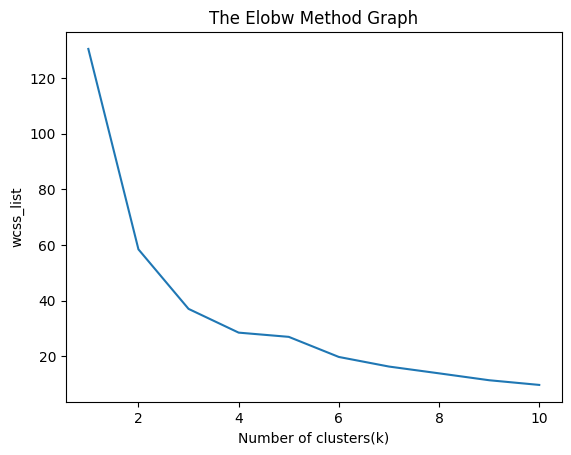

In [9]:
from sklearn.cluster import KMeans
wscc_list=[]

for i in range(1,11):
  kmeans= KMeans(n_clusters=i,init='k-means++',random_state=123)
  kmeans.fit(x)
  wscc_list.append(kmeans.inertia_)

print(wscc_list)
plt.plot(range(1,11),wscc_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()


In [10]:
kmeans= KMeans(n_clusters=3,init='k-means++',random_state=123)
y_predict=kmeans.fit_predict(x)

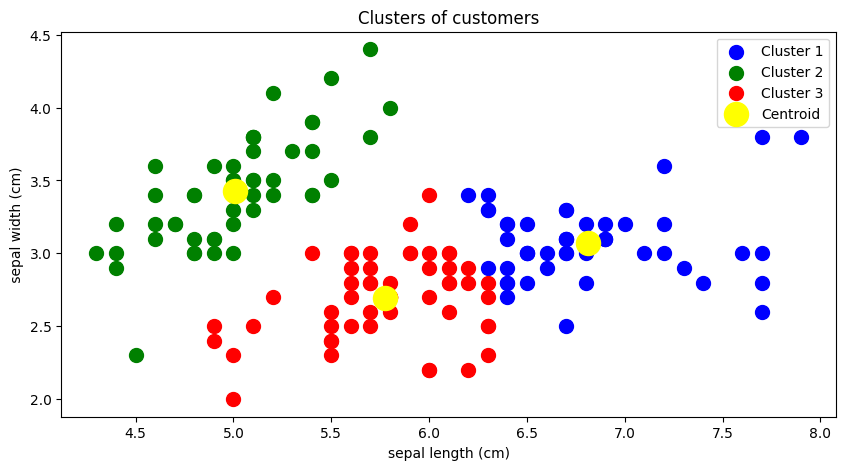

In [12]:
plt.figure(figsize=(10,5))

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')

plt.title('Clusters of customers')
plt.xlabel('sepal length (cm)')
plt.ylabel(' sepal width (cm) ')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(x, y_predict)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.45


The Silhouette Score ranges from -1 to 1, where:

+1 → Perfectly clustered (well-separated clusters)

0 → Overlapping clusters (not clearly separated)

-1 → Incorrect clustering (samples assigned to the wrong cluster)

A score of 0.45 indicates moderately good clustering—the clusters are reasonably well-defined but not perfect.It suggests meaningful clusters, but there might be some overlap.